In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind, f_oneway

## Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv('annual-co2-emissions-usa.csv')

data.columns = [
    "Year", 
    "Coal CO2 Emissions", 
    "Natural Gas CO2 Emissions", 
    "Aviation Gasoline CO2 Emissions", 
    "Distillate Fuel Oil CO2 Emissions", 
    "Hydrocarbon Gas Liquids CO2 Emissions", 
    "Jet Fuel CO2 Emissions", 
    "Kerosene CO2 Emissions", 
    "Lubricants CO2 Emissions", 
    "Motor Gasoline CO2 Emissions", 
    "Petroleum Coke CO2 Emissions", 
    "Residual Fuel Oil CO2 Emissions", 
    "Other Petroleum Products CO2 Emissions", 
    "Petroleum Excluding Biofuels CO2 Emissions", 
    "Total Energy CO2 Emissions (MMT)"
]

data = data.iloc[1:].reset_index(drop=True)

# Convert the Year column to numeric, setting errors='coerce' will turn non-numeric values to NaN
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Filter the data for the years 2018 to 2022 and keep only the 'Year' and 'Total Energy CO2 Emissions' columns
filtered_data = data[(data['Year'] >= 2018) & (data['Year'] <= 2022)][['Year', 'Total Energy CO2 Emissions (MMT)']]

# Convert 'Total Energy CO2 Emissions' to numeric
filtered_data['Total Energy CO2 Emissions (MMT)'] = pd.to_numeric(filtered_data['Total Energy CO2 Emissions (MMT)'], errors='coerce')

filtered_data.reset_index(drop=True, inplace=True)

filtered_data['Year'] = filtered_data['Year'].astype(int)

filtered_data.insert(0, 'Country', 'United States')

# Display the cleaned data
filtered_data

,Country,Year,Total Energy CO2 Emissions (MMT)
0,United States,2018,5278.222
1,United States,2019,5146.993
2,United States,2020,4583.690
3,United States,2021,4905.623
4,United States,2022,4938.516


In [3]:
data_2018 = pd.read_csv('2018-remote-work-data.csv')
data_2019 = pd.read_csv('2019-remote-work-data.csv')
data_2020 = pd.read_csv('2020-remote-work-data.csv')
data_2021 = pd.read_csv('2021-remote-work-data.csv')
data_2022 = pd.read_csv('2022-remote-work-data.csv')

In [4]:
work_from_home_2018 = data_2018[data_2018['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked at home:']
work_from_home_2019 = data_2019[data_2019['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked from home:']
work_from_home_2020 = data_2020[data_2020['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked from home:']
work_from_home_2021 = data_2021[data_2021['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked from home:']
work_from_home_2022 = data_2022[data_2022['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked from home:']

In [25]:
country = 'United States'

years = [2018, 2019, 2020, 2021, 2022]

total_worked_from_home = [
    work_from_home_2018['United States!!Estimate'].values[0],
    work_from_home_2019['United States!!Estimate'].values[0],
    work_from_home_2020['United States!!Estimate'].values[0],
    work_from_home_2021['United States!!Estimate'].values[0],
    work_from_home_2022['United States!!Estimate'].values[0]
]

formatted_remote_data = pd.DataFrame({
    'Country': [country] * len(years),
    'Year': years,
    'Total Worked From Home': total_worked_from_home
})

formatted_remote_data['Total Worked From Home'] = formatted_remote_data['Total Worked From Home'].str.replace(',', '')

formatted_remote_data['Total Worked From Home'] = formatted_remote_data['Total Worked From Home'].astype(int)

formatted_remote_data['Total Worked From Home (Millions)'] = formatted_remote_data['Total Worked From Home'] / 1_000_000

formatted_remote_data = formatted_remote_data.drop(columns=['Total Worked From Home'])

formatted_remote_data

,Country,Year,Total Worked From Home (Millions)
0,United States,2018,8.094220
1,United States,2019,8.816739
2,United States,2020,23.748392
3,United States,2021,27.336738
4,United States,2022,24.181288


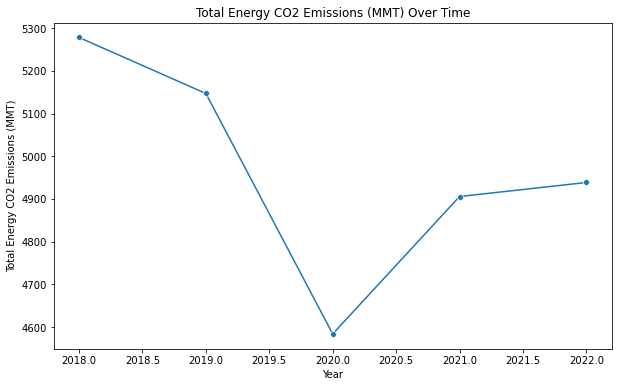

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='Year', y='Total Energy CO2 Emissions (MMT)', marker='o')
plt.title('Total Energy CO2 Emissions (MMT) Over Time')
plt.xlabel('Year')
plt.ylabel('Total Energy CO2 Emissions (MMT)')
plt.show()

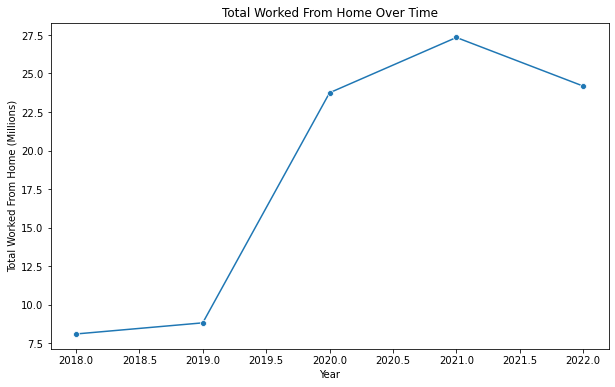

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=formatted_remote_data, x='Year', y='Total Worked From Home (Millions)', marker='o')
plt.title('Total Worked From Home Over Time')
plt.xlabel('Year')
plt.ylabel('Total Worked From Home (Millions)')
plt.show()

## Analysis

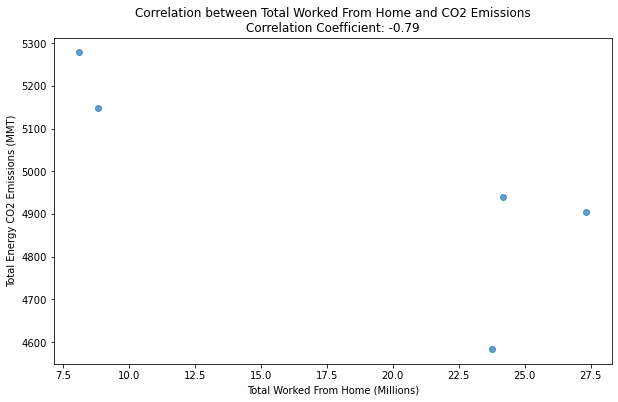

-0.7878812382984175

In [39]:
merged_data = pd.merge(filtered_data, formatted_remote_data, on=['Country', 'Year'])

correlation = merged_data['Total Energy CO2 Emissions (MMT)'].corr(merged_data['Total Worked From Home (Millions)'])

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total Worked From Home (Millions)'], merged_data['Total Energy CO2 Emissions (MMT)'], alpha=0.7)
plt.title(f'Correlation between Total Worked From Home and CO2 Emissions\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Total Worked From Home (Millions)')
plt.ylabel('Total Energy CO2 Emissions (MMT)')
plt.show()

correlation

In [47]:
X = merged_data['Total Worked From Home (Millions)']
Y = merged_data['Total Energy CO2 Emissions (MMT)']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Total Energy CO2 Emissions (MMT)   R-squared:                       0.621
Model:                                          OLS   Adj. R-squared:                  0.494
Method:                               Least Squares   F-statistic:                     4.910
Date:                              Wed, 05 Jun 2024   Prob (F-statistic):              0.113
Time:                                      22:01:27   Log-Likelihood:                -32.010
No. Observations:                                 5   AIC:                             68.02
Df Residuals:                                     3   BIC:                             67.24
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              5387.9923    206.334     26.113      0.000    4731.346    6044.639
Total Worked From Home (Millions)   -22.6402     10.217     -2.216      0.113     -55.155       9.874
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.141
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.858
Skew:                          -0.975   Prob(JB):                        0.651
Kurtosis:                       2.438   Cond. No.                         49.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
def standardize(X):
    return (X - X.mean()) / X.std()

residuals = standardize(model.resid)

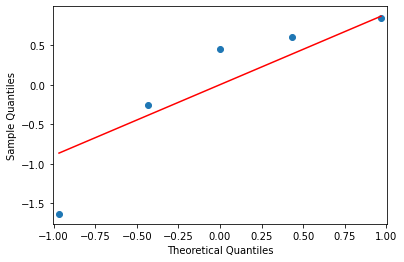

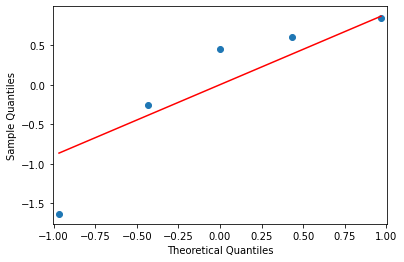

In [45]:
sm.qqplot(residuals, line='s')